In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [18]:
login_counts = pd.read_json('logins.json')

In [19]:
login_counts.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [20]:
login_counts.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [21]:
login_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


1. Aggregate these login counts based on 15-minute time intervals

In [22]:
login_counts.set_index('login_time', inplace=True)
login_counts['count'] = 1
login_counts.sort_index(inplace=True)
login_counts_agg = login_counts.resample("15min").sum()

In [23]:
login_counts_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [24]:
login_counts_agg['count'].sum()

93142

2. Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.

In [25]:
login_counts_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


So the data goes from January 1 to April 13 in 1970.

In [26]:
today = datetime.datetime(2017, 10, 20)
today.weekday() 

4

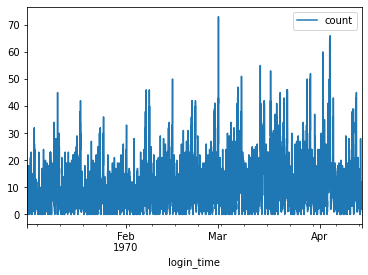

In [27]:
# Create a plot of demand for the entire period.
login_counts_agg.plot()
plt.show()

There is not much that we can see from this graph, other than that demand rises like a constant period, which is probably demand rising on the weekends. Try smoothing this with a window of the previous day to better see when the demand rises.

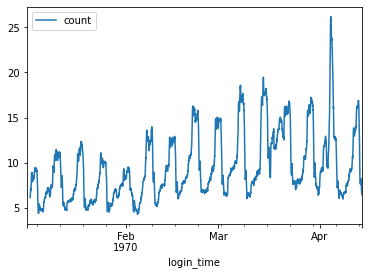

In [28]:
login_counts_agg.rolling(window=96).mean().plot()
plt.show()

It is better now to see how demand rises and falls on a weekly basis

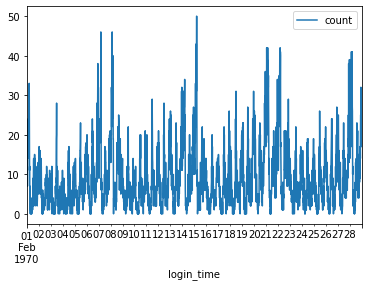

In [29]:
#plot demand just for February month to get more insights:
login_counts_agg.loc['1970-02'].plot()
plt.show()

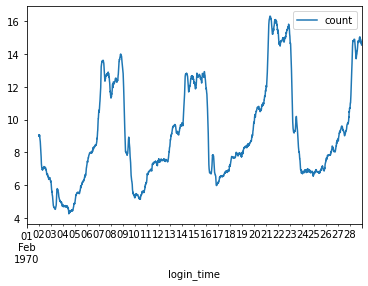

In [30]:
login_counts_agg.loc['1970-02'].rolling(window=96).mean().plot()
plt.show()

It is clear now that demand rises on weekends. There are also declines in demand on weekends. It seems that the declines are due to nighttime.

In [31]:
# Let's do now for one week
datetime.datetime(1970, 2, 1).weekday()

6

So the first day of the month was a Sunday. So, now let's plot that first week

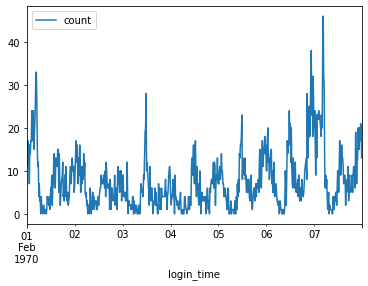

In [32]:
login_counts_agg.loc['1970-02-01':'1970-02-07'].plot()
plt.show()

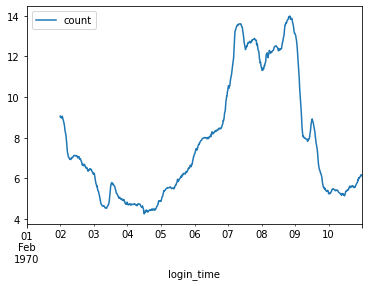

In [33]:
login_counts_agg.loc['1970-02-01':'1970-02-10'].rolling(window=96).mean().plot()
plt.show()

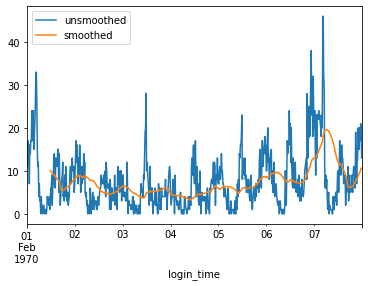

In [34]:
un_smoothed = login_counts_agg['count']['1970-02-01':'1970-02-07']
smoothed = un_smoothed.rolling(window=48).mean()
one_week = pd.DataFrame({'unsmoothed':un_smoothed, 'smoothed':smoothed})
one_week.plot()
plt.show()

Plot one weekend to see how demand spikes. Take the weekend of Friday, 6th February to Monday, 9th February.

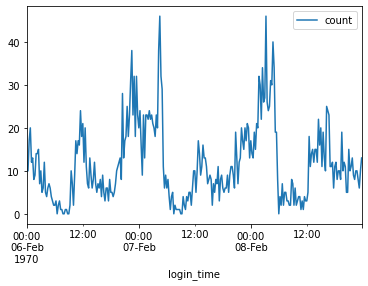

In [35]:
login_counts_agg.loc['1970-02-06':'1970-02-08'].plot()
plt.show()

It looks like demand is greatest around midnight on weekends

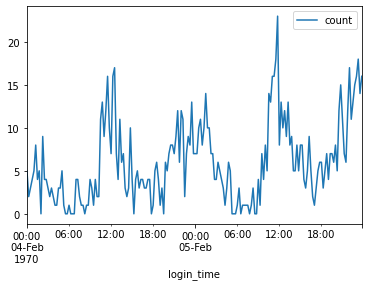

In [36]:
# Plot two weekdays
login_counts_agg.loc['1970-02-04':'1970-02-05'].plot()
plt.show()

In above plot, demand is highest at noon, and at midnight.

Try a Tuesday-Wednesday pair in the month of March.

In [37]:
date = datetime.datetime(1970, 3, 1)
date.weekday()

6

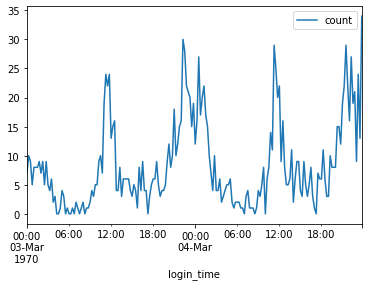

In [38]:
# March 1st is Sunday. So,let's take March 3rd and March 4th
login_counts_agg.loc['1970-03-03':'1970-03-04' ].plot()
plt.show()

Again in above plot it is seen that demand is the highest at noon and at midnight.

So, now we can reach to 2 conclusions from our EDA:

1. Demand is greater on the weekends than during the week.
2. Deman is the greatest around midnight and at noon for both weekdays and weekends.